# Unit 5 - Financial Planning

In [25]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [26]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [44]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [45]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [46]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price'] 
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price'] 

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $36813.18
The current value of your 5.3 ETH is $11122.85


In [42]:
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120517318,
            "total_supply": 120517318,
            "max_supply": 120517318,
            "quotes": {
                "USD": {
                    "price": 1547.35,
                    "volume_24h": 10254372397,
                    "market_cap": 186320052974,
                    "percentage_change_1h": 0.0697576350312032,
                    "percentage_change_24h": -4.53244909728737,
                    "percentage_change_7d": -1.41352536199609,
                    "percent_change_1h": 0.0697576350312032,
                    "percent_change_24h": -4.53244909728737,
                    "percent_change_7d": -1.41352536199609
                },
                "CAD": {
                    "price": 2102.074975,
                    "volume_24h": 13930564901.3245,
     

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [55]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [56]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [57]:
# Format current date as ISO format
today_date = pd.Timestamp("2023-01-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
closing_price_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today_date,
    end = today_date
).df
closing_price_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-24 05:00:00+00:00,99.84,100.32,99.68,100.28,6538592,20244,100.146185,AGG
2023-01-24 05:00:00+00:00,398.88,401.15,397.64,400.20,59524911,434104,399.936468,SPY


In [58]:
# Reorganize the DataFrame
# Separate ticker data
AGG = closing_price_df[closing_price_df['symbol']=='AGG'].drop('symbol', axis =1)
SPY = closing_price_df[closing_price_df['symbol']=='SPY'].drop('symbol', axis =1)

In [59]:
# Concatenate the ticker DataFrames
combined_data = pd.concat([AGG, SPY], axis = 1, keys=['AGG','SPY'])

# Preview DataFrame
combined_data.head()

AGG                                              \
                            open    high    low   close   volume trade_count   
timestamp                                                                      
2023-01-24 05:00:00+00:00  99.84  100.32  99.68  100.28  6538592       20244   

                                          SPY                         \
                                 vwap    open    high     low  close   
timestamp                                                              
2023-01-24 05:00:00+00:00  100.146185  398.88  401.15  397.64  400.2   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-24 05:00:00+00:00  59524911      434104  399.936468

In [65]:
# Pick AGG and SPY close prices
agg_close_price = combined_data['AGG']['close']['2023-01-24 05:00:00+00:00']
spy_close_price = combined_data['SPY']['close']['2023-01-24 05:00:00+00:00']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.28
Current SPY closing price: $400.2


In [66]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price *  my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20010.00
The current value of your 200 AGG shares is $20056.00


### Savings Health Analysis

In [67]:
my_spy_value

20010.0

In [118]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data

stock_value = my_agg_value + my_spy_value
crypto_value = my_btc_value + my_eth_value
list = [stock_value , crypto_value]
# Create savings DataFrame
df_savings = pd.DataFrame(list,columns = ['amount'], index = ['crypto' , 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,40066.000000
shares,47936.029641


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

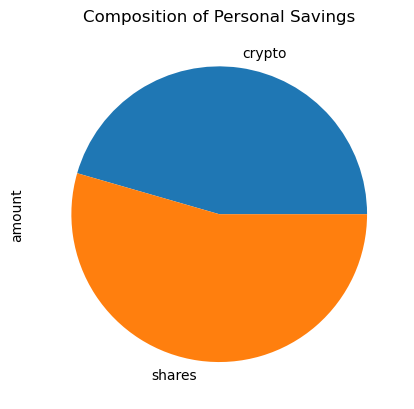

In [121]:
# Plot savings pie chart
pie_chart_savings = df_savings['amount']
pie_chart_savings.plot.pie( title = 'Composition of Personal Savings')

In [123]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = stock_value + crypto_value
print(total_amount_savings)
print(emergency_fund)

88002.0296415
36000


In [125]:
# Validate saving health
savings_needed = total_amount_savings - emergency_fund
if total_amount_savings >= emergency_fund:
    print(f"Congratulations your savings passes the requirement")
elif total_amount_savings < emergency_fund: 
    print(f" you are {savings_needed} from reaching the requiremnet")

Congratulations your savings passes the requirement


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [126]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [130]:
# Get 5 years' worth of historical data for SPY and AGG

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"


new_closing_price_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = new_closing_price_df[new_closing_price_df['symbol']=='AGG'].drop('symbol', axis =1)
SPY = new_closing_price_df[new_closing_price_df['symbol']=='SPY'].drop('symbol', axis =1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis = 1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()
df_stock_data.tail()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2021-04-26 04:00:00+00:00  114.74  114.8015  114.65  114.65  3480303   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.37  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.20  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.09  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.33  114.49  6469432   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2021-04-26 04:00:00+00:00       13520  114.706244  417.44  418.22  416.8111   
2021-04-27 04:00:00+00:00       12720  114.498315  417.93  418.14  416.3000   
2021-04-28 04:00:00+00:00       24303  114.379810  417.81  419.01  416.9000   
2021-04-29 04:00:00+00:00       21096  114.250702  420.32  420.72  416.4400   
2021-04-30 04:00:00+00:00       19582  114.456246  417.63  418.54  416.3400   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2021-04-26 04:00:00+00:00  417.61  51824860      295870  417.508245  
2021-04-27 04:00:00+00:00  417.52  50297139      296300  417.481360  
2021-04-28 04:00:00+00:00  417.40  50692781      330049  417.742098  
2021-04-29 04:00:00+00:00  420.06  76965583      443396  418.824046  
2021-04-30 04:00:00+00:00  417.30  84731942      478844  417.651995

In [135]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
#spy60agg40
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [136]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [137]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alber\OneDrive\Desktop\weekly\API\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998528,1.009343,1.001364,1.002214,1.023989,0.998136,1.012980,1.003754,0.997715,0.998794,...,1.004383,1.007192,1.000687,0.997612,0.993437,1.003012,1.000298,0.998845,1.009604,0.990130
2,0.993565,0.999585,0.999009,0.992561,1.039056,0.990534,1.004698,1.005550,0.998128,1.005829,...,1.004010,1.002085,0.998866,0.994235,0.995149,0.998913,1.007319,0.999004,1.004888,0.997326
3,0.979316,0.997194,1.001093,0.982847,1.025865,0.997242,0.995363,1.008987,0.998468,0.998420,...,1.011707,0.999385,0.997761,0.995155,0.999500,1.009998,0.997132,1.003768,1.005092,1.002185
4,0.974614,0.991139,0.992402,0.975029,1.027994,1.009716,0.988621,1.012706,0.996550,0.994513,...,1.005921,1.001405,1.003034,0.987824,0.994394,1.017458,0.997347,1.006116,1.008504,1.004673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,34.184948,14.344747,15.346119,7.829057,22.475222,17.672320,11.885425,15.310330,16.673504,28.013922,...,12.700832,14.973274,8.404144,16.552933,23.068754,6.540751,30.247709,3.768515,6.922279,20.915600
7557,34.290682,14.436860,15.509375,7.801705,22.409619,17.646667,11.662319,15.189279,16.584505,28.084246,...,12.717872,14.997208,8.410125,16.338377,23.227076,6.538586,30.218157,3.771674,6.941329,20.665210
7558,34.519376,14.552639,15.433370,7.874941,22.584495,17.724155,11.617570,15.212365,16.486064,28.252779,...,12.615592,14.901143,8.507946,16.568635,23.306032,6.451457,30.227283,3.725443,6.963538,20.752001
7559,34.888144,14.670769,15.360036,7.862100,22.359433,17.625366,11.758908,15.261811,16.354810,27.869749,...,12.667212,14.891847,8.566046,16.549222,23.636833,6.438127,30.130551,3.720237,7.008857,20.739379


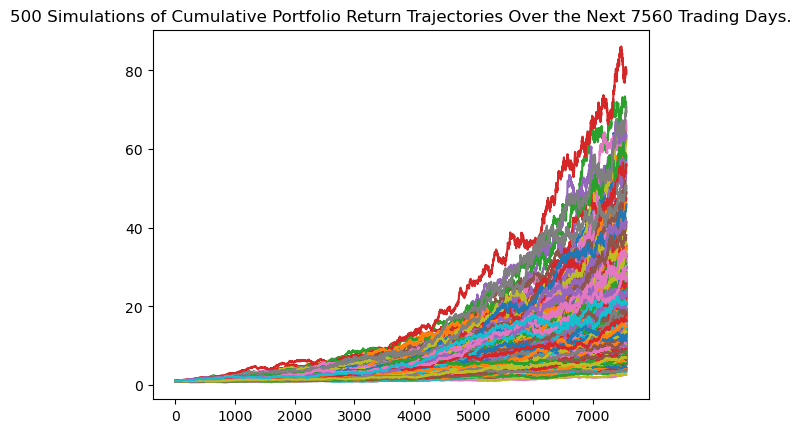

In [138]:
# Plot simulation outcomes
plotline = MC_thirtyyear.plot_simulation()

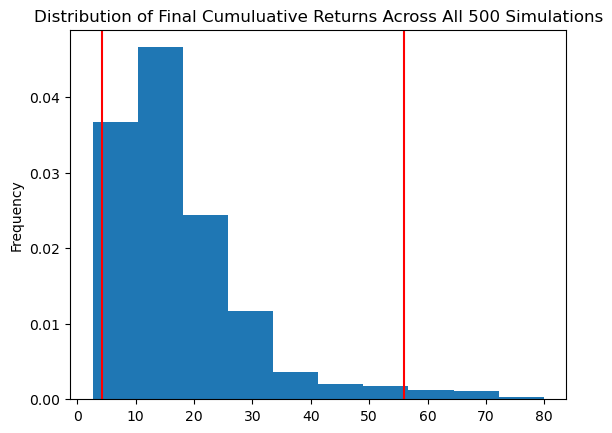

In [140]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [141]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean             17.755927
std              11.944085
min               2.636677
25%               9.745605
50%              14.631748
75%              22.445248
max              79.911974
95% CI Lower      4.277240
95% CI Upper     55.985741
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [144]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*20000,2)
ci_upper = round(summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85544.79 and $1119714.83


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [145]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*30000,2)
ci_upper = round(summary[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $128317.19 and $1679572.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [152]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [153]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alber\OneDrive\Desktop\weekly\API\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006530,0.999901,1.003973,1.004799,1.013305,0.983882,1.002295,1.009991,0.999552,1.011051,...,1.000213,1.015369,0.997925,1.000731,1.006399,1.004008,1.000134,1.000054,1.002504,1.006150
2,0.999391,0.987389,1.008662,0.997454,1.011969,0.982965,1.001178,1.007864,1.004760,1.007269,...,0.995564,1.008315,0.999471,1.016860,0.992533,1.016967,0.990566,1.007411,0.991442,1.009834
3,1.006392,0.992750,1.009757,1.000686,1.022194,0.999224,1.008480,1.013234,1.004412,1.012939,...,0.984968,1.001307,1.005434,1.010218,0.989945,1.007753,0.989558,1.017517,0.991902,1.013986
4,1.009395,0.989976,1.009621,0.998539,1.030166,0.994417,0.998136,1.016991,1.002662,1.018260,...,0.985960,0.991496,1.017219,1.015502,0.987478,1.014154,0.994656,1.010293,0.992923,1.018499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.491934,1.994673,1.905457,1.852716,1.926178,1.753413,1.482888,2.413448,1.895190,1.290422,...,1.720863,1.919967,1.505752,2.889829,1.361051,1.244708,1.663235,1.534834,1.325329,1.615617
1257,1.507959,1.976922,1.896274,1.864130,1.934999,1.772318,1.479061,2.409099,1.912198,1.292084,...,1.708627,1.907745,1.486730,2.928897,1.382203,1.257413,1.664924,1.561073,1.325692,1.593269
1258,1.510650,1.987947,1.893545,1.876554,1.939594,1.785986,1.469231,2.400019,1.910731,1.287810,...,1.704670,1.899147,1.490098,2.917321,1.370721,1.265387,1.647771,1.572596,1.335253,1.601862
1259,1.515877,1.990580,1.882313,1.873880,1.947252,1.797912,1.481500,2.395645,1.893307,1.316895,...,1.721724,1.900974,1.487246,2.934363,1.370724,1.274449,1.655254,1.557569,1.325022,1.597093


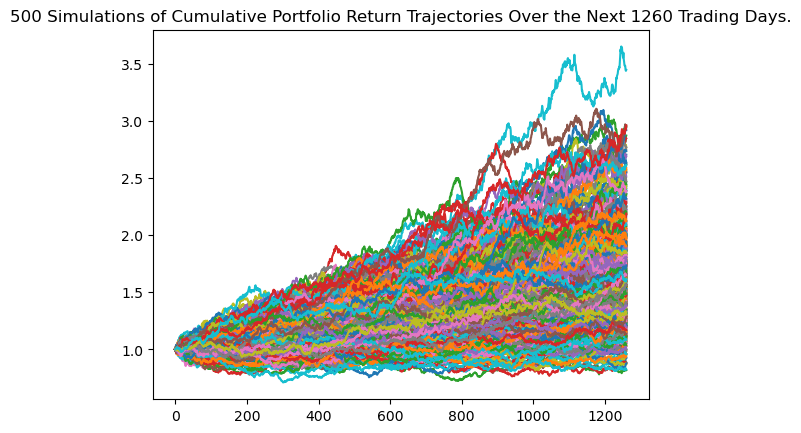

In [154]:
# Plot simulation outcomes
plotline_fiveyear = MC_fiveyear.plot_simulation()

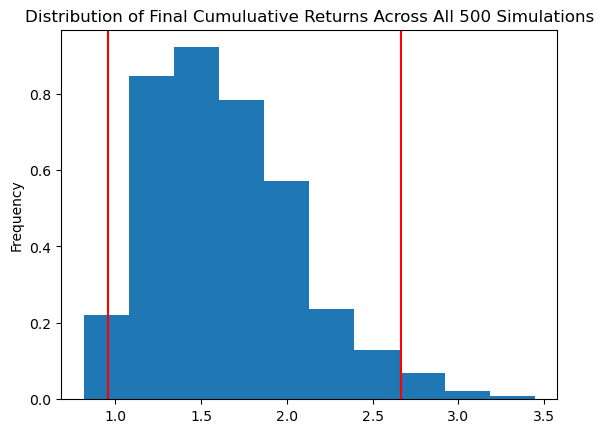

In [155]:
# Plot probability distribution and confidence intervals
dist_fiveyear = MC_fiveyear.plot_distribution()

In [157]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(fiveyear_summary)

count           500.000000
mean              1.639538
std               0.431264
min               0.817958
25%               1.317515
50%               1.573822
75%               1.897682
max               3.445179
95% CI Lower      0.959418
95% CI Upper      2.662630
Name: 1260, dtype: float64


In [159]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(fiveyear_summary[8]*initial_investment,2)
ci_upper_five = round(fiveyear_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $9594.18 and $26626.3


### Ten Years Retirement Option

In [161]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
#spy80agg20
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [162]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alber\OneDrive\Desktop\weekly\API\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004198,0.995457,1.012653,1.010928,0.998042,1.016434,0.999769,1.015183,0.994095,1.003553,...,1.001250,0.996018,1.005521,0.985020,0.988290,0.990111,0.993123,1.009499,1.011547,1.009743
2,1.013399,0.991478,1.000750,1.011179,1.002487,1.013598,1.018354,1.029872,1.004963,0.998151,...,1.003633,1.000829,1.025466,0.978264,0.988023,0.971817,0.993831,1.007430,0.999869,1.001119
3,1.011801,1.008869,1.001103,1.001423,1.004681,1.019381,1.016980,1.041195,1.008740,0.988720,...,0.984868,1.004288,1.019345,0.975769,0.987992,0.969978,0.971768,0.995636,1.005887,0.991449
4,1.007080,0.997292,1.002812,0.995251,0.996169,1.025549,1.006221,1.053121,0.991980,0.996854,...,0.967185,1.020983,1.031299,0.967813,0.992879,0.968347,0.960660,1.000751,0.989014,0.985011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.922944,3.343699,1.642196,1.588995,3.465332,2.907519,5.488084,1.145286,4.150956,4.047612,...,1.735861,7.372988,2.525853,2.368865,2.811065,1.637347,4.334581,1.716533,2.588277,6.031036
2517,7.936941,3.374765,1.618470,1.600789,3.450181,2.900013,5.492000,1.141956,4.180697,4.057735,...,1.739699,7.495824,2.463513,2.329107,2.801666,1.647292,4.290947,1.709965,2.608049,6.076527
2518,7.948283,3.371345,1.626380,1.622691,3.430654,2.896298,5.504449,1.151204,4.151162,4.028677,...,1.740860,7.529621,2.443381,2.331255,2.771517,1.651707,4.377357,1.702648,2.643432,6.164409
2519,7.827099,3.398271,1.620579,1.617350,3.522008,2.886708,5.443442,1.141464,4.178472,4.043915,...,1.743592,7.460724,2.462984,2.347967,2.753288,1.699321,4.424334,1.707258,2.659648,6.227484


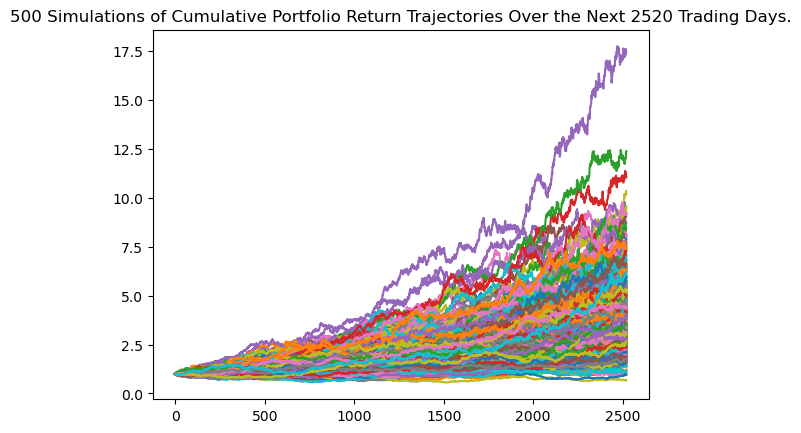

In [163]:
# Plot simulation outcomes
tenyear_plotline = MC_tenyear.plot_simulation()

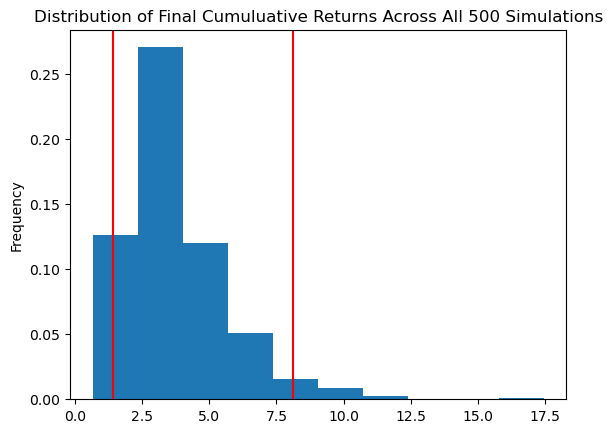

In [164]:
# Plot probability distribution and confidence intervals
dist_tenyear = MC_tenyear.plot_distribution()

In [165]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyear_summary = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
tenyear_summary

count           500.000000
mean              3.719057
std               1.864069
min               0.668491
25%               2.471912
50%               3.295439
75%               4.520043
max              17.441491
95% CI Lower      1.404301
95% CI Upper      8.106286
Name: 2520, dtype: float64

In [166]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tenyear_summary[8]*initial_investment,2)
ci_upper_ten = round(tenyear_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $28086.02 and $162125.72


In [ ]:
#Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

In [ ]:
# the answer will depend on how much of saving required in order to be suffice for customer's retirement plan. But summing up from the conclusion above,
#if client follow this strategy of retirement plan by leaning harder on stock, he/she has 95% chances to increase their saving by at least approximately 50%
#now realistically and based on data in the past, 50% increase for 10 years implies to 5% growth per year, meaning the investment may at least outrun the inflation or the conservative bond return along those years.
